### Importing libraries

In [2]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

### Ignoring warnings

In [3]:
warnings.filterwarnings("ignore")

### Importing dataset

In [9]:
url = 'https://raw.githubusercontent.com/siddharthsaumya/csv/main/social_network_ads.csv'
datasets = pd.read_csv(url)

### Preparing dataset

In [5]:
X = datasets.iloc[:, [2, 3]].values
Y = datasets.iloc[:, 4].values

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.25, random_state=0)
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)
classifier = LogisticRegression(random_state=0)
classifier.fit(X_Train, Y_Train)
Y_Pred = classifier.predict(X_Test)

### Getting the confusion matrix

In [6]:
cm = confusion_matrix(Y_Test, Y_Pred)
print("Confusion matrix:")
print(cm)
print("\n")

Confusion matrix:
[[65  3]
 [ 8 24]]




In [7]:
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start=X_Set[:, 0].min() - 1, stop=X_Set[:, 0].max() + 1, step=0.01),np.arange(start=X_Set[:, 1].min() - 1, stop=X_Set[:, 1].max() + 1, step=0.01))


### Ploting graph

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


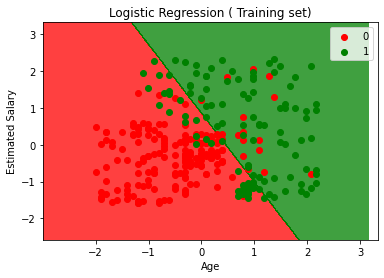

In [8]:
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression ( Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()